In [1]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib.parse import urlencode
import json
from datetime import datetime, timedelta, date
import time

# Helpful site: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations
# look for the taxon ids and place ids in the urls on the web site.

q = {
    "type": "collection",
    "sources": "projects",
    "per_page": 100,
     "page": 1,
}
#url = "https://api.inaturalist.org/v1/projects?q=BioBlitz&type=collection&per_page=30&order_by=created&page="
url = "https://api.inaturalist.org/v1/search?q=Bioblitz"


#del bioblitzProjects
bioblitzProjects = pd.DataFrame()

num_pages = 3

Define functions to retrieve observations, species, identifer and observer counts from iNaturalist

In [195]:
def fetchObservations(projectID):
  time.sleep(2)    
  url = "https://api.inaturalist.org/v1/observations?project_id="
  outputObs = requests.get(url+str(projectID))
  return(outputObs.json()["total_results"])

In [196]:
def fetchSpecies(projectID):
  time.sleep(2)
  url = "https://api.inaturalist.org/v1/observations/species_counts?project_id="
  outputSp = requests.get(url+str(projectID))
  return(outputSp.json()["total_results"])

In [197]:
def fetchIdentifiers(projectID):
  time.sleep(2)
  url = "https://api.inaturalist.org/v1/observations/identifiers?project_id="
  outputIde = requests.get(url+str(projectID))
  return(outputIde.json()["total_results"])

In [198]:
def fetchObservers(projectID):
  time.sleep(2)
  url = "https://api.inaturalist.org/v1/observations/observers?project_id="
  outputObservers = requests.get(url+str(projectID))
  return(outputObservers.json()["total_results"])

In [199]:
def fetchPlace(placeID):
    time.sleep(2)
    url = "https://api.inaturalist.org/v1/places/"
    outputPlace = requests.get(url+str(placeID))
    if outputPlace.json()["total_results"] == 1:
        return(outputPlace.json()["results"][0].get('location'))
    else:
        return 0

In [7]:
def parseDate(dateIn):

        dateOut = datetime.min

        if len(dateIn) == 15:
          dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M')
        elif len(dateIn) == 16:
          if re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]/[0-9][0-9]:[0-9][0-9]$", dateIn): #2020-07-15/11:00
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%H:%M')
          elif re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9][ ]24:00$", dateIn): #2020-08-16 24:00
            print("Bad end date ", dateIn, len(dateIn), key['field'])
          elif re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]/[0-9][0-9]:[0-9][0-9]$", dateIn): #2020-07-15/11:00
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%H:%M')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M')
        elif len(dateIn) == 19:
          if "M" in dateIn or "m" in dateIn:
            if "/" in dateIn:
              dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%I:%M %p')
            else:
              dateOut=datetime.strptime(dateIn,'%Y-%m-%d %I:%M %p')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M:%S')
        elif len(dateIn) == 10:
          if "/" in dateIn:
            if re.search("^[1-2][0-9][0-9][0-9]\/[0-9][0-9]\/[0-9][0-9]$", dateIn):
              dateOut=datetime.strptime(dateIn,'%Y/%m/%d')
            else:
              dateOut=datetime.strptime(dateIn,'%d/%m/%Y')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d')
        elif len(dateIn) == 23:
          if "M" not in dateIn:
            dayTime = dateIn[0:16].strip()
            dateOut=datetime.strptime(dayTime,'%Y-%m-%d %H:%M')
          else:
            print("Bad end date ", dateIn, len(dateIn), key['field'])
        elif len(dateIn) == 25:
          if "T" in dateIn:
            dayTime = dateIn[0:16]
            dateOut=datetime.strptime(dayTime,'%Y-%m-%dT%H:%M') #2014-03-28T00:00
          else:
            dayTime = dateIn[0:16]
            dateOut=datetime.strptime(dayTime,'%Y-%m-%d %H:%M')
        else:
          print("Bad start date ", dateIn, len(dateIn), key['field'])
        return dateOut



In [8]:
# get all the project from iNaturalist

page = int(1)
while True:
    r = requests.get(url, params=q)
    bioblitzProjects = pd.concat([bioblitzProjects, pd.DataFrame(r.json()["results"])], sort=False)

    #if r.json()["results"] == []:
    #    print("no more results, stopping")
    #    break
    if page > num_pages:
      break
    if page == 1:
        num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
        print(r.json()["total_results"])
        print(num_pages)
        print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
    print("Retrieving page ", url+" page " + str(page))
    page += 1
    q["page"] = page
    time.sleep(1)

5493
55
Results: 5493 ,  55  pages total
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 1
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 2
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 3
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 4
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 5
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 6
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 7
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 8
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 9
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 10
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 11
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 12
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 13
Retrie

In [9]:
projects =  bioblitzProjects["record"]

In [304]:
count = 0
beginning = datetime.min
ending = datetime.min
lastdate = datetime.now()

year = 2012

#The start and end dates are in all sorts of formats, probably related to the locale of the computer where they were created.
#This means they all have to be parsed. Some have just one data and other none at all.
#Projects with no dates will be dropped.
#The porjects with dates that cannot be parsed will be printed out.

projectDetails = pd.DataFrame(columns=['projectID','createdAt','slug', 'placeID','rulePreferences', 'projectType', 'observationRule', 'searchParameters', 'start', 'end', 'duration', 'hours', 'observations', 'identifiers', 'observers', 'species', 'isUmbrella', 'description', 'location'])

for index, value in projects.items():
    print("Project ID ",value['id'])
    count += 1
    if count > 5600: #just for debugging to restrict the time it takes
      break
    for key in value['search_parameters']:
      if key['field'] == 'd1':
        beginning = parseDate(key['value'])
      elif key['field'] == 'd2':
        ending = parseDate(key['value'])
    if((ending-beginning) < timedelta(days = 10) and ending < lastdate) and isinstance(value['place_id'], int) and ending > beginning and year == ending.year:
      dfTemp = pd.DataFrame({"projectID":[value['id']], "createdAt":[value['created_at']], "searchParameters":[value['search_parameters']], "start":[beginning], "end":[ending], "duration":[ending-beginning], "hours":[(((ending-beginning).days)*24) + (((ending-beginning).seconds)/3600)],
                            "slug":[value['slug']], "placeID":[value['place_id']], "rulePreferences":[value['rule_preferences']], "project_type":[value['project_type']],
                            "observationRule":[value['project_observation_rules']], "isUmbrella":[value['is_umbrella']], "description":[value['description']], "location":fetchPlace(value['place_id']),
                            'observations':fetchObservations(value['id']), 'identifiers':fetchIdentifiers(value['id']), 'observers':fetchObservers(value['id']), 'species':fetchSpecies(value['id'])})
      projectDetails = projectDetails.append(dfTemp, ignore_index=True)
      print(count, " - ", value['slug'], " ", ending-beginning, ", ", ((ending-beginning).seconds)/3600, ", ", value['place_id'], ", ",ending.year)
      time.sleep(10)
    print("Count = ", count)

Project ID  65853
Count =  1
Project ID  10802
Count =  2
Project ID  3438
Count =  3
Project ID  40
Count =  4
Project ID  12302
Count =  5
Project ID  33965
Count =  6
Project ID  79
Count =  7
Project ID  17671
Count =  8
Project ID  13
Count =  9
Project ID  275
Count =  10
Project ID  1670
Count =  11
Project ID  6218
Count =  12
Project ID  6810
Count =  13
Project ID  1560
Count =  14
Project ID  73532
Count =  15
Project ID  12849
Count =  16
Project ID  14921
Count =  17
Project ID  17851
Count =  18
Project ID  10823
Count =  19
Project ID  17508
Count =  20
Project ID  49803
Count =  21
Project ID  60
Count =  22
Project ID  6812
Count =  23
Project ID  39262
Count =  24
Project ID  11048
Count =  25
Project ID  4542
Count =  26
Project ID  18625
Count =  27
Project ID  16766
Count =  28
Project ID  12511
Count =  29
Project ID  13914
Count =  30
Project ID  38310
Count =  31
Project ID  71433
Count =  32
Project ID  11924
Count =  33
Project ID  15848
Count =  34
Project ID

Count =  571
Project ID  19872
Count =  572
Project ID  7187
Count =  573
Project ID  10673
Count =  574
Project ID  14057
Count =  575
Project ID  23409
Count =  576
Project ID  20588
Count =  577
Project ID  21915
Count =  578
Project ID  18551
Count =  579
Project ID  12644
Count =  580
Project ID  17918
Count =  581
Project ID  26273
Count =  582
Project ID  1305
Count =  583
Project ID  9260
Count =  584
Project ID  24852
Count =  585
Project ID  4619
Count =  586
Project ID  5258
Count =  587
Project ID  26499
Count =  588
Project ID  19379
Count =  589
Project ID  14959
Count =  590
Project ID  22895
Count =  591
Project ID  6390
Count =  592
Project ID  3532
Count =  593
Project ID  13198
Count =  594
Project ID  19237
Count =  595
Project ID  8727
Count =  596
Project ID  15
Count =  597
Project ID  11495
Count =  598
Project ID  14990
Count =  599
Project ID  18591
Count =  600
Project ID  20373
Count =  601
Project ID  1663
Count =  602
Project ID  7195
Count =  603
Project 

Count =  1138
Project ID  4554
Count =  1139
Project ID  11847
Count =  1140
Project ID  14342
Count =  1141
Project ID  15239
Count =  1142
Project ID  2926
Count =  1143
Project ID  19007
Count =  1144
Project ID  9076
Count =  1145
Project ID  6833
Count =  1146
Project ID  6828
Count =  1147
Project ID  7127
Count =  1148
Project ID  8944
Count =  1149
Project ID  4548
Count =  1150
Project ID  22048
Count =  1151
Project ID  37829
Count =  1152
Project ID  33595
Count =  1153
Project ID  22159
Count =  1154
Project ID  2066
Count =  1155
Project ID  5973
Count =  1156
Project ID  12678
Count =  1157
Project ID  11337
Count =  1158
Project ID  22165
Count =  1159
Project ID  12876
Count =  1160
Project ID  3765
Count =  1161
Project ID  40018
Count =  1162
Project ID  9231
Count =  1163
Project ID  6438
Count =  1164
Project ID  4065
Count =  1165
Project ID  77493
Count =  1166
Project ID  18587
Count =  1167
Project ID  9229
Count =  1168
Project ID  7169
Count =  1169
Project ID

Project ID  19385
Count =  1763
Project ID  18291
Count =  1764
Project ID  23785
Count =  1765
Project ID  38680
Count =  1766
Project ID  14516
Count =  1767
Project ID  11023
Count =  1768
Project ID  27821
Count =  1769
Project ID  11285
Count =  1770
Project ID  7527
Count =  1771
Project ID  19078
Count =  1772
Project ID  21216
Count =  1773
Project ID  41986
Count =  1774
Project ID  22446
Count =  1775
Project ID  31625
Count =  1776
Project ID  50283
Count =  1777
Project ID  17572
Count =  1778
Project ID  24808
Count =  1779
Project ID  25588
Count =  1780
Project ID  7295
Count =  1781
Project ID  15816
Count =  1782
Project ID  20390
Count =  1783
Project ID  7593
Count =  1784
Project ID  23656
Count =  1785
Project ID  36419
Count =  1786
Project ID  47043
Count =  1787
Project ID  51540
Count =  1788
Project ID  2424
Count =  1789
Project ID  4214
Count =  1790
Project ID  26775
Count =  1791
Project ID  12877
Count =  1792
Project ID  28287
Count =  1793
Project ID  7

Project ID  37984
Count =  2388
Project ID  72771
Count =  2389
Project ID  72436
Count =  2390
Project ID  66920
Count =  2391
Project ID  60542
Count =  2392
Project ID  72262
Count =  2393
Project ID  72196
Count =  2394
Project ID  72222
Count =  2395
Project ID  43260
Count =  2396
Project ID  52573
Count =  2397
Project ID  3863
Count =  2398
Project ID  3931
Count =  2399
Project ID  3945
Count =  2400
Project ID  3931
Count =  2401
Project ID  3945
Count =  2402
Project ID  4145
Count =  2403
Project ID  4252
Count =  2404
Project ID  4339
Count =  2405
Project ID  4739
Count =  2406
Project ID  5192
Count =  2407
Project ID  5593
Count =  2408
Project ID  5888
Count =  2409
Project ID  5949
Count =  2410
Project ID  6244
Count =  2411
Project ID  6524
Count =  2412
Project ID  6922
Count =  2413
Project ID  6937
Count =  2414
Project ID  7032
Count =  2415
Project ID  7052
Count =  2416
Project ID  7155
Count =  2417
Project ID  7334
Count =  2418
Project ID  7344
Count =  241

Count =  3045
Project ID  70136
Count =  3046
Project ID  69588
Count =  3047
Project ID  49338
Count =  3048
Project ID  70287
Count =  3049
Project ID  70307
Count =  3050
Project ID  70317
Count =  3051
Project ID  49346
Count =  3052
Project ID  63171
Count =  3053
Project ID  70457
Count =  3054
Project ID  43260
Count =  3055
Project ID  32178
Count =  3056
Project ID  43601
Count =  3057
Project ID  70758
Count =  3058
Project ID  70514
Count =  3059
Project ID  70484
Count =  3060
Project ID  35323
Count =  3061
Project ID  14024
Count =  3062
Project ID  70509
Count =  3063
Project ID  70979
Count =  3064
Project ID  70994
Count =  3065
Project ID  70662
Count =  3066
Project ID  45818
Count =  3067
Project ID  66851
Count =  3068
Project ID  70372
Count =  3069
Project ID  36926
Count =  3070
Project ID  52495
Count =  3071
Project ID  38759
Count =  3072
Project ID  70359
Count =  3073
Project ID  71367
Count =  3074
Project ID  71579
Count =  3075
Project ID  19259
Count = 

Count =  3662
Project ID  76389
Count =  3663
Project ID  76457
Count =  3664
Project ID  76460
Count =  3665
Project ID  76463
Count =  3666
Project ID  76464
Count =  3667
Project ID  76465
Count =  3668
Project ID  76474
Count =  3669
Project ID  76483
Count =  3670
Project ID  76485
Count =  3671
Project ID  76486
Count =  3672
Project ID  76487
Count =  3673
Project ID  76488
Count =  3674
Project ID  77128
Count =  3675
Project ID  76201
Count =  3676
Project ID  76344
Count =  3677
Project ID  76686
Count =  3678
Project ID  76687
Count =  3679
Project ID  76691
Count =  3680
Project ID  76697
Count =  3681
Project ID  76698
Count =  3682
Project ID  76700
Count =  3683
Project ID  76701
Count =  3684
Project ID  76702
Count =  3685
Project ID  76706
Count =  3686
Project ID  76708
Count =  3687
Project ID  76989
Count =  3688
Project ID  76990
Count =  3689
Project ID  76991
Count =  3690
Project ID  77887
Count =  3691
Project ID  77917
Count =  3692
Project ID  77987
Count = 

Count =  4262
Project ID  87330
Count =  4263
Project ID  87675
Count =  4264
Project ID  86755
Count =  4265
Project ID  85296
Count =  4266
Project ID  87668
Count =  4267
Project ID  87045
Count =  4268
Project ID  87026
Count =  4269
Project ID  79594
Count =  4270
Project ID  78477
Count =  4271
Project ID  79574
Count =  4272
Project ID  84587
Count =  4273
Project ID  45024
Count =  4274
Project ID  76472
Count =  4275
Project ID  85646
Count =  4276
Project ID  87372
Count =  4277
Project ID  17560
Count =  4278
Project ID  81981
Count =  4279
Project ID  78422
Count =  4280
Project ID  74881
Count =  4281
Project ID  83588
Count =  4282
Project ID  86868
Count =  4283
Project ID  86241
Count =  4284
Project ID  71522
Count =  4285
Project ID  86961
Count =  4286
Project ID  79603
Count =  4287
Project ID  60839
Count =  4288
Project ID  87789
Count =  4289
Project ID  85914
Count =  4290
Project ID  83357
Count =  4291
Project ID  88040
Count =  4292
Project ID  80729
Count = 

Count =  4743
Project ID  28503
Count =  4744
Project ID  36170
Count =  4745
Project ID  11732
Count =  4746
Project ID  22693
Count =  4747
Project ID  17760
Count =  4748
Project ID  13083
Count =  4749
Project ID  120
Count =  4750
Project ID  31267
Count =  4751
Project ID  5639
Count =  4752
Project ID  15077
Count =  4753
Project ID  12928
Count =  4754
Project ID  28333
Count =  4755
Project ID  29120
Count =  4756
Project ID  47497
Count =  4757
Project ID  7142
Count =  4758
Project ID  1531
Count =  4759
Project ID  28493
Count =  4760
Project ID  6048
Count =  4761
Project ID  11219
Count =  4762
Project ID  11735
Count =  4763
Project ID  22176
Count =  4764
Project ID  20755
Count =  4765
Project ID  18929
Count =  4766
Project ID  19265
Count =  4767
Project ID  4303
Count =  4768
Project ID  4501
Count =  4769
Project ID  11344
Count =  4770
Project ID  32825
Count =  4771
Project ID  13568
Count =  4772
Project ID  48100
Count =  4773
Project ID  10534
Count =  4774
Pr

Count =  5262
Project ID  86341
Count =  5263
Project ID  86326
Count =  5264
Project ID  63129
Count =  5265
Project ID  78668
Count =  5266
Project ID  76360
Count =  5267
Project ID  86322
Count =  5268
Project ID  82824
Count =  5269
Project ID  84027
Count =  5270
Project ID  85218
Count =  5271
Project ID  86713
Count =  5272
Project ID  85528
Count =  5273
Project ID  85196
Count =  5274
Project ID  82895
Count =  5275
Project ID  82018
Count =  5276
Project ID  83436
Count =  5277
Project ID  86817
Count =  5278
Project ID  82834
Count =  5279
Project ID  42002
Count =  5280
Project ID  44580
Count =  5281
Project ID  81795
Count =  5282
Project ID  69980
Count =  5283
Project ID  86503
Count =  5284
Project ID  86956
Count =  5285
Project ID  85641
Count =  5286
Project ID  86877
Count =  5287
Project ID  75885
Count =  5288
Project ID  86457
Count =  5289
Project ID  86945
Count =  5290
Project ID  86947
Count =  5291
Project ID  86949
Count =  5292
Project ID  86951
Count = 

In [305]:
projectDetails.to_csv('file1'+str(year)+'.csv')

In [ ]:
projectDetails['projectID'].count()

In [275]:
projectDetailsUnq = projectDetails.drop_duplicates(subset = ["slug"])

In [276]:
projectDetailsUnq.head()

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
0,2017-05-19T15:35:09+00:00,Norfolk Forest Important Bird and Biodiversity...,1 days 00:00:00,2017-06-18 12:00:00,24.000000,286,False,"42.6878486059,-80.5052680551","[{'id': 16123, 'operator': 'observed_in_place?...",3861,31,118830,12511,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-17T12:00:00...",norfolk-forest-important-bird-and-biodiversity...,1481,2017-06-17 12:00:00
1,2017-04-20T14:02:34+00:00,"AREA Parchi e Regione Lombardia, in collaboraz...",6 days 00:00:00,2017-05-25 00:00:00,144.000000,350,False,"45.6225234681,9.7709435551",[],3154,98,10870,11924,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",bioblitz-lombardia-2017,918,2017-05-19 00:00:00
2,2017-05-03T18:44:32+00:00,"With over 900+ acres to explore, there is much...",1 days 00:30:00,2017-07-16 10:30:00,24.500000,217,False,"43.3786180275,-80.3597017789",[],1702,50,120636,12192,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-07-15T10:00:00...",rare-community-bioblitz-2017-rare-bioblitz-com...,947,2017-07-15 10:00:00
3,2017-05-31T18:51:10+00:00,The Thousand Islands Bioblitz is a fun communi...,1 days 00:00:00,2017-06-17 15:00:00,24.000000,91,False,"44.3588190195,-76.0670306138","[{'id': 17154, 'operator': 'observed_in_place?...",1602,10,120586,12743,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-16T15:00:00...",thousand-islands-bioblitz-bioblitz-des-mille-iles,813,2017-06-16 15:00:00
4,2017-08-15T20:24:24+00:00,We will be using the #Anacostiabioblitz hashta...,3 days 23:59:00,2017-09-24 23:59:00,95.983333,319,False,"39.0010890165,-76.9523234989","[{'id': 19347, 'operator': 'observed_in_place?...",1850,112,120938,14136,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-09-21T00:00:00...",anacostia-river-virtual-bioblitz,547,2017-09-21 00:00:00


In [277]:
projectDetailsUnq.loc[projectDetails['slug'] == "personal-bioblitz-spring-2015"]

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start


In [278]:
projectDetailsUnq.loc[projectDetails['slug'] == "akrotiri-bioblitz-cyprus"]

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start


The number of unique bioblitz projects found

In [279]:
projectDetailsUnq['projectID'].count()

150

Create a dataframe with the details of each each project and a calculation of the duration of each project

In [280]:
projectDetailsUnq

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
0,2017-05-19T15:35:09+00:00,Norfolk Forest Important Bird and Biodiversity...,1 days 00:00:00,2017-06-18 12:00:00,24.000000,286,False,"42.6878486059,-80.5052680551","[{'id': 16123, 'operator': 'observed_in_place?...",3861,31,118830,12511,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-17T12:00:00...",norfolk-forest-important-bird-and-biodiversity...,1481,2017-06-17 12:00:00
1,2017-04-20T14:02:34+00:00,"AREA Parchi e Regione Lombardia, in collaboraz...",6 days 00:00:00,2017-05-25 00:00:00,144.000000,350,False,"45.6225234681,9.7709435551",[],3154,98,10870,11924,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",bioblitz-lombardia-2017,918,2017-05-19 00:00:00
2,2017-05-03T18:44:32+00:00,"With over 900+ acres to explore, there is much...",1 days 00:30:00,2017-07-16 10:30:00,24.500000,217,False,"43.3786180275,-80.3597017789",[],1702,50,120636,12192,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-07-15T10:00:00...",rare-community-bioblitz-2017-rare-bioblitz-com...,947,2017-07-15 10:00:00
3,2017-05-31T18:51:10+00:00,The Thousand Islands Bioblitz is a fun communi...,1 days 00:00:00,2017-06-17 15:00:00,24.000000,91,False,"44.3588190195,-76.0670306138","[{'id': 17154, 'operator': 'observed_in_place?...",1602,10,120586,12743,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-16T15:00:00...",thousand-islands-bioblitz-bioblitz-des-mille-iles,813,2017-06-16 15:00:00
4,2017-08-15T20:24:24+00:00,We will be using the #Anacostiabioblitz hashta...,3 days 23:59:00,2017-09-24 23:59:00,95.983333,319,False,"39.0010890165,-76.9523234989","[{'id': 19347, 'operator': 'observed_in_place?...",1850,112,120938,14136,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-09-21T00:00:00...",anacostia-river-virtual-bioblitz,547,2017-09-21 00:00:00
5,2017-09-11T17:22:14+00:00,Purpose of this bioblitz is to document the di...,4 days 00:00:00,2017-10-13 00:00:00,96.000000,210,False,"34.2267283111,-118.557109338","[{'id': 19074, 'operator': 'observed_in_place?...",1628,80,121952,14750,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-10-09', 'value...",lausd-local-district-northwest-bioblitz-2017,186,2017-10-09 00:00:00
6,2016-02-05T13:18:16+00:00,"On Saturday, April 23, the Commonwealth of Vir...",4 days 00:00:00,2017-10-13 00:00:00,96.000000,329,False,"37.5108673459,-78.6663604926",[],1442,57,7,6198,NaN,,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'quality_grade', 'value': ['researc...",va-bioblitz-2016,612,2017-10-09 00:00:00
7,2017-05-11T21:18:45+00:00,This project is a snapshot in time of the flor...,2 days 00:00:00,2017-05-21 00:00:00,48.000000,230,False,"38.8786319464,-77.1009975795",[],1251,43,1719,12366,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",2017-arlington-county-virginia-bioblitz,507,2017-05-19 00:00:00
8,2017-10-05T02:36:39+00:00,Threatened Species Day marks the date - 7th Se...,4 days 07:00:00,2017-11-05 20:00:00,103.000000,152,False,"-42.9759669807,147.3270500278",[],1179,37,122210,15303,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-11-01T13:00:00...",extinction-matters-bioblitz-kingborough,479,2017-11-01 13:00:00
9,2017-03-27T22:13:19+00:00,<p>In honour of Canada's 150th anniversary cel...,3 days 00:00:00,2017-06-26 00:00:00,72.000000,74,False,"61.0126138871,-138.5001897901","[{'id': 20233, 'operator': 'observed_in_place?...",1060,16,122725,11451,NaN,bioblitz,"[{'field': 'quality_grade', 'value

In [281]:
projectDetailsUnq.drop(projectDetailsUnq[projectDetailsUnq.duration >= timedelta(days = 7)].index, inplace=True) # Drop any bioblitzes that are longer than a week (168 hours)

In [282]:
projectDetailsUnq.drop(projectDetailsUnq[projectDetailsUnq.hours <= 0] .index, inplace=True) # Drop any bioblitzes that have a zero of negative duration

In [283]:
projectDetailsUnq.drop(projectDetailsUnq[pd.isna(projectDetailsUnq.placeID)] .index, inplace=True) # Drop any bioblitzes that are not specific to a place

In [284]:
projectDetailsUnq.set_index('projectID')

,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
projectID,,,,,,,,,,,,,,,,,,,
12511,2017-05-19T15:35:09+00:00,Norfolk Forest Important Bird and Biodiversity...,1 days 00:00:00,2017-06-18 12:00:00,24.000000,286,False,"42.6878486059,-80.5052680551","[{'id': 16123, 'operator': 'observed_in_place?...",3861,31,118830,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-17T12:00:00...",norfolk-forest-important-bird-and-biodiversity...,1481,2017-06-17 12:00:00
11924,2017-04-20T14:02:34+00:00,"AREA Parchi e Regione Lombardia, in collaboraz...",6 days 00:00:00,2017-05-25 00:00:00,144.000000,350,False,"45.6225234681,9.7709435551",[],3154,98,10870,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",bioblitz-lombardia-2017,918,2017-05-19 00:00:00
12192,2017-05-03T18:44:32+00:00,"With over 900+ acres to explore, there is much...",1 days 00:30:00,2017-07-16 10:30:00,24.500000,217,False,"43.3786180275,-80.3597017789",[],1702,50,120636,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-07-15T10:00:00...",rare-community-bioblitz-2017-rare-bioblitz-com...,947,2017-07-15 10:00:00
12743,2017-05-31T18:51:10+00:00,The Thousand Islands Bioblitz is a fun communi...,1 days 00:00:00,2017-06-17 15:00:00,24.000000,91,False,"44.3588190195,-76.0670306138","[{'id': 17154, 'operator': 'observed_in_place?...",1602,10,120586,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-16T15:00:00...",thousand-islands-bioblitz-bioblitz-des-mille-iles,813,2017-06-16 15:00:00
14136,2017-08-15T20:24:24+00:00,We will be using the #Anacostiabioblitz hashta...,3 days 23:59:00,2017-09-24 23:59:00,95.983333,319,False,"39.0010890165,-76.9523234989","[{'id': 19347, 'operator': 'observed_in_place?...",1850,112,120938,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-09-21T00:00:00...",anacostia-river-virtual-bioblitz,547,2017-09-21 00:00:00
14750,2017-09-11T17:22:14+00:00,Purpose of this bioblitz is to document the di...,4 days 00:00:00,2017-10-13 00:00:00,96.000000,210,False,"34.2267283111,-118.557109338","[{'id': 19074, 'operator': 'observed_in_place?...",1628,80,121952,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-10-09', 'value...",lausd-local-district-northwest-bioblitz-2017,186,2017-10-09 00:00:00
6198,2016-02-05T13:18:16+00:00,"On Saturday, April 23, the Commonwealth of Vir...",4 days 00:00:00,2017-10-13 00:00:00,96.000000,329,False,"37.5108673459,-78.6663604926",[],1442,57,7,NaN,,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'quality_grade', 'value': ['researc...",va-bioblitz-2016,612,2017-10-09 00:00:00
12366,2017-05-11T21:18:45+00:00,This project is a snapshot in time of the flor...,2 days 00:00:00,2017-05-21 00:00:00,48.000000,230,False,"38.8786319464,-77.1009975795",[],1251,43,1719,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-05-19T00:00:00...",2017-arlington-county-virginia-bioblitz,507,2017-05-19 00:00:00
15303,2017-10-05T02:36:39+00:00,Threatened Species Day marks the date - 7th Se...,4 days 07:00:00,2017-11-05 20:00:00,103.000000,152,False,"-42.9759669807,147.3270500278",[],1179,37,122210,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-11-01T13:00:00...",extinction-matters-bioblitz-kingborough,479,2017-11-01 13:00:00


In [285]:
zz = projectDetailsUnq.groupby(['duration']).count()

In [286]:
zz

,createdAt,description,end,hours,identifiers,isUmbrella,location,observationRule,observations,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
duration,,,,,,,,,,,,,,,,,,,
0 days 02:00:00,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2
0 days 03:00:00,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2
0 days 04:00:00,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4
0 days 05:00:00,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3
0 days 06:00:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 07:00:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 08:30:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
0 days 10:00:00,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2
0 days 10:30:00,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


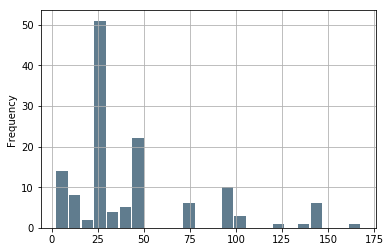

In [287]:
projectDetailsUnq["hours"].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')

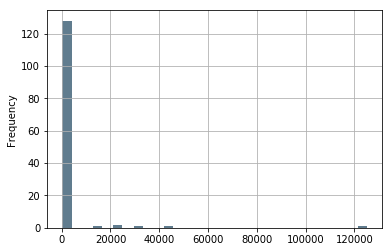

In [288]:
projectDetailsUnq["observations"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

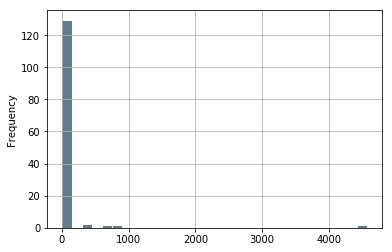

In [289]:
projectDetailsUnq["observers"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

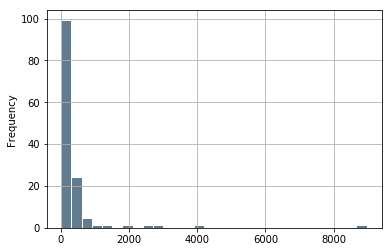

In [290]:
projectDetailsUnq["species"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

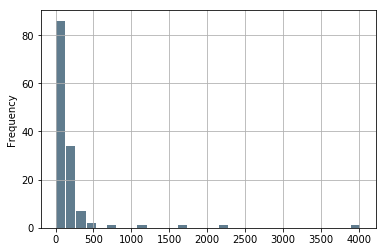

In [291]:
projectDetailsUnq["identifiers"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

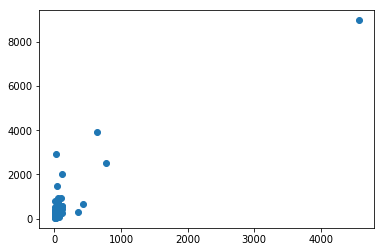

In [292]:
plt.scatter(projectDetailsUnq["observers"],projectDetailsUnq["species"])

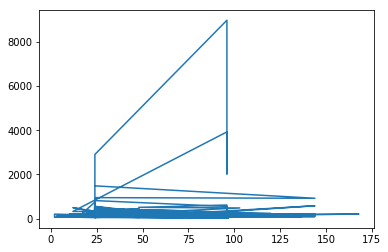

In [293]:
plt.plot(projectDetailsUnq["hours"],projectDetailsUnq["species"])